<a href="https://colab.research.google.com/github/Norberto27/Norberto27/blob/main/Desafio_Regresi%C3%B3n_1_NRMU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INDICACIONES

1) Cada uno debe completar las consignas indicadas en este notebook.

2) Deben postear como solución enlace a su notebook colab público y también debe estar en su repositorio GitHub.

3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# Dataset

Genere un dataset sintético con al menos 4 variables y una variable continua para usarlo luego en regresión.



# **Justificación de la adaptación del dataset**

He optado por la creación de un dataset basado en un escenario realista (una fábrica de pastas), en lugar de generar un dataset completamente sintético.

En este caso, las variables como tiempo de producción, cantidad de empleados, cantidad de materias primas, entre otras, han sido modeladas de manera artificial, pero a partir de suposiciones realistas que emulan el comportamiento de una situación real.

Este enfoque enriquece el contexto al ofrecer una aplicación directa de la regresión lineal en un entorno industrial, lo que añade valor práctico y facilita la comprensión del problema a resolver.

Anteriormente, he trabajado en situaciones similares utilizando herramientas de Investigación Operativa como la Programación Lineal y el método Simplex, lo que refuerza la coherencia de este enfoque.

A pesar de basarse en un escenario de la vida real, el dataset sigue un enfoque sintético en cuanto a su estructura y generación, ya que los datos no provienen de una fuente real, sino de suposiciones modeladas artificialmente. Esto mantiene la naturaleza controlada de los datos, permitiendo cumplir con los requisitos técnicos de la práctica y facilitando la experimentación.

Además, este enfoque no solo cumple con las exigencias de generar un dataset sintético, sino que también me ha permitido una mejor interpretación y comprensión del problema al trabajar con un contexto familiar y práctico, lo que me resulta especialmente beneficioso en esta etapa de formación.


Describa como generó los datos.

# **Contexto del Problema en una Fábrica de Pastas**

En este proyecto, voy a modelar y resolver un problema en una fábrica de pastas utilizando un enfoque de regresión. La idea es predecir una variable continua clave en la producción, como puede ser la cantidad de pasta producida (en kilogramos) o los ingresos totales por ventas, en función de diversas características y factores que afectan el proceso de fabricación.
El problema planteado se relaciona con una situación que, en mi experiencia como profesional en Investigación Operativa, he abordado utilizando diversas herramientas matemáticas y estadísticas. Sin embargo, en esta oportunidad utilizaremos técnicas de inteligencia artificial, aplicando un modelo de regresión para resolverlo.

# **Definición de Variables**

En el contexto de la fábrica de pastas, voy a modelar una variable dependiente (y), que será la producción diaria de pasta (en kg),

y la predecire en función de cuatro variables independientes (X1, X2, X3, X4), que representan diferentes aspectos del proceso de producción. Las variables son las siguientes:

•	X1 (Cantidad de horas trabajadas por día): Es una variable continua que representa el número de horas que las líneas de producción están operativas. A mayor cantidad de horas trabajadas, se espera que la producción aumente.

•	X2 (Temperatura del horno en grados Celsius): Esta variable sigue una distribución normal y representa la temperatura promedio a la que operan los hornos industriales. Si la temperatura es demasiado baja o alta, podría afectar negativamente la producción o la calidad del producto, por lo que se espera que esta variable tenga un impacto significativo.

•	X3 (Cantidad de trabajadores en planta): Se trata de una variable discreta que representa el número de operarios que están trabajando en la planta de producción. A mayor cantidad de trabajadores, generalmente se espera un mayor rendimiento en términos de producción.

•	X4 (Costos de insumos en dólares): Esta variable refleja el costo diario de los insumos utilizados para producir la pasta, como harina, huevo, y electricidad. Los cambios en los costos de insumos pueden influir indirectamente en la producción, ya que aumentos en estos costos pueden llevar a restricciones en el volumen producido, o a la toma de decisiones operativas que limiten la producción para reducir gastos.

Generación de la Variable Dependiente (Producción de Pasta)

La variable dependiente **y** se representa como una combinación lineal de las variables independientes con un término de error, para reflejar el comportamiento real y las variaciones no controlables del proceso:

•	y = 3 * X1 - 2 * X2 + 0.5 * X3 + 2 * X4 + error

•	El coeficiente positivo frente a X1 sugiere que, cuantas más horas se trabaje en la fábrica, más pasta se producirá.

•	El coeficiente negativo frente a X2 indica que, si la temperatura del horno se desvía de los niveles óptimos, la producción disminuirá.

•	El coeficiente positivo frente a X3 muestra que más trabajadores en la línea de producción aumentan la cantidad de pasta producida.

•	El coeficiente frente a X4 refleja cómo los cambios en los costos de los insumos afectan la producción.

En este caso, un aumento en los costos podría llevar a una mayor eficiencia en la producción o ajustes en los procesos que mejoran la cantidad de producción para maximizar el uso de insumos.


In [ ]:
import numpy as np
import pandas as pd

# Fijamos una semilla para asegurar reproducibilidad
np.random.seed(42)

# Número de muestras (días de producción simulados)
n = 1000

# Generamos 4 variables predictoras (correspondientes a factores de producción en la fábrica)
# X1: Cantidad de horas trabajadas por día (entre 0 y 10 horas)
horas_trabajadas = np.random.uniform(0, 10, n)

# X2: Temperatura promedio del horno (distribución normal con media 50°C y desviación estándar 5°C)
temperatura_horno = np.random.normal(50, 5, n)

# X3: Cantidad de trabajadores en planta (entre 10 y 100)
trabajadores = np.random.randint(10, 100, n)

# X4: Costos diarios de insumos (distribución uniforme entre -5 y 5 para simular fluctuaciones en el costo)
costos_insumos = np.random.uniform(-5, 5, n)

# Generamos la variable dependiente: Producción diaria de pasta en kg (combinación de los factores anteriores)
# La fórmula refleja el impacto de cada factor en la producción
# y = 3 * horas_trabajadas - 2 * temperatura_horno + 0.5 * trabajadores + 2 * costos_insumos + error
error = np.random.normal(0, 1, n)
produccion_pasta = 3 * horas_trabajadas - 2 * temperatura_horno + 0.5 * trabajadores + 2 * costos_insumos + error

# Creamos un DataFrame con los datos simulados
df_fabrica_pastas = pd.DataFrame({
    'Horas_Trabajadas': horas_trabajadas,
    'Temperatura_Horno': temperatura_horno,
    'Trabajadores': trabajadores,
    'Costos_Insumos': costos_insumos,
    'Produccion_Pasta': produccion_pasta
})

# Mostramos las primeras filas del dataset
df_fabrica_pastas.head()


,Horas_Trabajadas,Temperatura_Horno,Trabajadores,Costos_Insumos,Produccion_Pasta
0,3.745401,50.888505,74,1.727030,-48.758106
1,9.507143,43.323278,66,2.966814,-18.878315
2,7.319939,51.900989,49,-2.495321,-62.939306
3,5.986585,53.052929,23,1.248741,-73.692717
4,1.560186,52.798952,44,0.717460,-77.941516


# **Explicación del Código Adaptado:**


a continuacion se retera el contenido de las variables, con pequeños detalles adicionales:

**horas_trabajadas**: Esta variable simula el número de horas que las líneas de producción operan cada día. Como puede variar entre días, se genera como un número continuo entre 0 y 10 horas.

**temperatura_horno:** Esta variable representa la temperatura promedio del horno, que es un factor crítico en la calidad y cantidad de la producción. Se modela como una distribución normal con una media de 50°C y una desviación estándar de 5°C, para reflejar pequeñas fluctuaciones diarias.

**trabajadores:** Aquí simulamos el número de trabajadores en la fábrica de pastas, variando entre 10 y 100 operarios, lo que afecta directamente la capacidad de producción diaria.

**costos_insumos:** Los costos de insumos son un factor fluctuante que puede impactar indirectamente en la cantidad de producción, ya que cambios en los costos podrían llevar a ajustes operativos. Para simplificar, usamos una distribución uniforme que genera costos diarios entre -5 y 5 (esto representa variaciones positivas y negativas en los costos, como ahorro o gasto adicional).

**produccion_pasta:** Esta es la variable dependiente que buscamos predecir: la cantidad diaria de pasta producida en kilogramos. Está determinada por una combinación de los factores anteriores con coeficientes ponderados. Cada uno de estos coeficientes indica la relación de cada variable con la producción:

3 * horas_trabajadas: A mayor cantidad de horas trabajadas, mayor producción.

-2 * temperatura_horno: Si la temperatura del horno se desvía del óptimo, la producción disminuye.

0.5 * trabajadores: Un mayor número de trabajadores mejora la producción, pero con una tasa menor que las horas trabajadas.

2 * costos_insumos: Un aumento en los costos puede llevar a ajustes que aumenten la eficiencia, reflejado en una ligera mejora de la producción en este modelo.

error: Se agrega un componente de error para simular variaciones no controladas en la producción diaria.


# **DataFrame**

Finalmente, los datos se almacenan en un DataFrame de pandas llamado df_fabrica_pastas, que contiene las variables simuladas y la producción de pasta diaria.

# **Caso Imaginario de Aplicación**

Este dataset simula el comportamiento diario de la producción de una fábrica de pastas durante 1000 días.

El gerente de producción podría usar estos datos para analizar qué factores tienen un mayor impacto en la producción y ajustar las operaciones para maximizar la producción de pasta. Podría utilizar estos resultados para tomar decisiones tales como:

¿Cuántas horas diarias debe trabajar la línea de producción para maximizar la eficiencia?

¿Cuál es la temperatura óptima del horno para obtener el mejor rendimiento?

¿Cuántos trabajadores son necesarios para asegurar una alta producción sin generar sobrecostos en mano de obra?

# **Relación con Investigación Operativa**

En un contexto real de Investigación Operativa, este modelo ayudaría a optimizar el proceso de producción mediante el análisis y simulación de diferentes escenarios.

El modelo de regresión permite explorar el impacto de múltiples factores en la producción de pasta, lo que se alinea con los objetivos de maximización de eficiencia y minimización de costos, típicos de los problemas en esta disciplina.

En este caso, con este enfoque, puedo apreciar cómo puedo utilizar tanto mis conocimientos en Investigación Operativa como herramientas modernas de Inteligencia Artificial (que estoy adquiriendo) para resolver problemas prácticos en la industria, con mayor facilidad y precision.








# **Interpretación del Dataset**

El dataset utilizado en este análisis fue diseñado para simular la operación de una fábrica de pastas, con las siguientes variables clave:

Horas_Trabajadas: El número de horas que los empleados dedican a la producción.

Temperatura_Horno: La temperatura del horno durante la cocción, un factor crucial en la producción de pasta.

Trabajadores: La cantidad de empleados en el turno de producción.

Costos_Insumos: Los costos asociados a los insumos utilizados, como materia prima y energía.

Produccion_Pasta: La cantidad de pasta producida (variable dependiente).

El objetivo de este análisis fue comprender cómo estos factores impactan la producción de pasta. Al entrenar modelos de regresión, podemos determinar la importancia de cada variable en la predicción de la producción, lo que puede ayudar a optimizar los procesos en una situación real. Las relaciones entre las variables reflejan aspectos prácticos de una fábrica, como el efecto de las horas trabajadas y el costo de los insumos sobre la eficiencia y la cantidad de producción.

## Preprocesamiento

Indique e implemente el pre-procesamiento necesario previo a entrenar los modelos

Atento a lo solicitado en la consigna del trabajo a realizar voy a proceder a la explicacion de lo que voy a ir haciendo en esta etapa del Pre Procesamiento para una mayor claridad y comprension de esta etapa

# **El preprocesamiento de los datos**

es una parte crucial , ya que garantiza que los modelos de regresión recibiran datos limpios, coherentes y en un formato adecuado para entrenar correctamente.

En el caso de la fábrica de pastas, seguiremos un enfoque paso a paso para preparar el dataset que hemos generado.

Aquí detallo el preprocesamiento que realizare, así como las razones detrás de cada paso y las explicaciones.

A continuacion detallo los pasos a seguir, habiendo consultado los apuntes de clase e informacion de distintas fuentes:

# **Pasos del Preprocesamiento**

Inspección de valores faltantes

Escalado de las variables

División del conjunto de datos en entrenamiento y prueba


# **1. Inspección de valores faltantes**

Es importante verificar si existen valores nulos o faltantes en el dataset, ya que los modelos de Machine Learning no funcionan bien con datos incompletos. Si encontramos valores faltantes, debemos decidir cómo manejarlos (eliminación o imputación).

In [ ]:
# Revisamos si hay valores nulos en el DataFrame
print(df_fabrica_pastas.isnull().sum())


Horas_Trabajadas     0
Temperatura_Horno    0
Trabajadores         0
Costos_Insumos       0
Produccion_Pasta     0
dtype: int64


# **Explicación:**

El método isnull() verifica si existen valores faltantes en cada columna, y luego usamos sum() para contar cuántos valores nulos hay en cada una.

Si encontráramos valores nulos, podríamos proceder con la imputación de esos valores o eliminarlos.

En este caso, como los datos son generados sintéticamente, no esperamos valores faltantes.

# **Interpretar los resultados obtenidos.**

Dado que el resultado muestra que no hay valores nulos en ninguna de las columnas:

Horas_Trabajadas: 0
Temperatura_Horno: 0
Trabajadores: 0
Costos_Insumos: 0
Produccion_Pasta: 0

Observamos que no será necesario realizar procedimientos de imputación ni eliminación de datos. El dataset está completo, lo que nos permite avanzar directamente a los siguientes pasos del análisis y modelado sin necesidad de hacer ajustes para tratar datos faltantes.

En resumen, este análisis  confirma que el dataset está limpio en cuanto a la presencia de valores nulos, lo que es una buena base para comenzar con el modelado y garantiza una mayor calidad en los resultados.

# **2. Escalado de las variables**

En muchos modelos de Machine Learning, es fundamental escalar las variables para que todas estén en el mismo rango de valores.

Esto es particularmente importante para algoritmos de regresión, ya que las diferencias de escala entre las variables pueden afectar negativamente el proceso de entrenamiento.

En este caso, usaremos

MinMaxScaler o StandardScaler de la biblioteca scikit-learn

para escalar las variables predictoras.

Vamos a normalizar las variables para que se encuentren en un rango similar.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separar las variables predictoras (X) y la variable dependiente (y)
X = df_fabrica_pastas[['Horas_Trabajadas', 'Temperatura_Horno', 'Trabajadores', 'Costos_Insumos']]
y = df_fabrica_pastas['Produccion_Pasta']

# Aplicar escalado estándar (media = 0, desviación estándar = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un nuevo DataFrame con las variables escaladas
df_fabrica_pastas_scaled = pd.DataFrame(X_scaled, columns=['Horas_Trabajadas', 'Temperatura_Horno', 'Trabajadores', 'Costos_Insumos'])

# Añadir la variable dependiente (producción) al DataFrame escalado
df_fabrica_pastas_scaled['Produccion_Pasta'] = y.values

# Mostrar las primeras filas del DataFrame escalado
df_fabrica_pastas_scaled.head()


,Horas_Trabajadas,Temperatura_Horno,Trabajadores,Costos_Insumos,Produccion_Pasta
0,-0.396301,0.079727,0.768877,0.636740,-48.758106
1,1.576957,-1.451016,0.452287,1.069707,-18.878315
2,0.827893,0.284592,-0.220465,-0.837822,-62.939306
3,0.371251,0.517675,-1.249380,0.469708,-73.692717
4,-1.144685,0.466286,-0.418333,0.284170,-77.941516


Interpretacion de los datos escalados

# **3. División del conjunto de datos en entrenamiento y prueba**




Antes de entrenar los modelos, es fundamental dividir los datos en dos conjuntos: uno para entrenar el modelo y otro para evaluar su rendimiento. En este caso, he optado por una división del 80% para entrenamiento y el 20% para prueba, lo cual es una práctica común en problemas de regresión. Esta separación garantiza que el modelo no solo se ajuste bien a los datos de entrenamiento, sino que también pueda generalizar a nuevos datos no vistos previamente."

In [ ]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verificamos el tamaño de los conjuntos
print(f"Tamaño de los datos de entrenamiento: {X_train.shape}")
print(f"Tamaño de los datos de prueba: {X_test.shape}")


Tamaño de los datos de entrenamiento: (800, 4)
Tamaño de los datos de prueba: (200, 4)


La división de los datos ha resultado en 800 observaciones para el conjunto de entrenamiento y 200 para el de prueba.

Este equilibrio asegura que el modelo tiene suficiente información para aprender patrones significativos, mientras que los datos de prueba permiten evaluar el rendimiento del modelo en un entorno más cercano a la realidad.

El uso de un random_state específico también nos garantiza la repetibilidad de los resultados, facilitando la revisión del modelo por terceros o su futura mejora

# **Análisis Empresarial del Paso**

Desde una perspectiva empresarial, este paso asegura que el modelo de predicción que estoy construyendo sea robusto y generalizable. Al evaluar el rendimiento del modelo con datos que no ha visto antes (los de prueba), permite obtener una mejor idea de cómo funcionará en situaciones reales, como nuevas producciones de pasta en la fábrica que no estén incluidas en el conjunto original de datos. Esto me permite confiar en que el modelo será útil en escenarios futuros, ayudando a predecir la producción y optimizar el proceso.

## Modelos

Elija al menos dos modelos de regresión de los vistos en clases.
Entrene dichos modelos.
Detalle los hiperparámetros elegidos.

Atento a la consigana, para eleccion de los modelos de regresion, he seleccionado dos de los vistos en clase para entrenarlos con los datos preprocesados de la fábrica de pastas. En primer lugar voy a utilizar la implementacion del modelo de regresion lineal  Múltiple y luego el de Regresión Ridge, dos de los modelos más comunes. Luego, detallaré los hiperparámetros utilizados para cada uno.

# **1. Regresión Lineal Múltiple**

La Regresión Lineal Múltiple es una extensión de la regresión lineal simple, que permite modelar la relación entre una variable dependiente y varias variables independientes. Este modelo intentará encontrar una ecuación lineal que minimice el error entre las predicciones y los valores observados.

In [ ]:
from sklearn.linear_model import LinearRegression

# Creamos una instancia del modelo de regresión lineal
modelo_lineal = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
modelo_lineal.fit(X_train, y_train)

# Predecimos la producción de pasta en el conjunto de prueba
y_pred_lineal = modelo_lineal.predict(X_test)

# Mostramos los coeficientes del modelo entrenado
print(f"Coeficientes del modelo: {modelo_lineal.coef_}")
print(f"Intercepto del modelo: {modelo_lineal.intercept_}")


Coeficientes del modelo: [ 8.73438498 -9.86040026 12.63996544  5.69138381]
Intercepto del modelo: -59.18312605543349


# **Hiperparámetros:**

coef_: Son los coeficientes que acompañan a cada variable independiente en la ecuación de regresión. Indican cómo afecta un cambio en la variable predictora en la variable objetivo (producción de pasta, en este caso).
intercept_: Es el valor que toma la variable dependiente cuando todas las variables independientes son cero.

Explicación:

Este modelo no tiene hiperparámetros ajustables, ya que la regresión lineal estándar se basa en minimizar la suma de los errores cuadráticos Por lo tanto, el modelo ajusta automáticamente los coeficientes para que minimicen el error entre las predicciones y los valores observados.

Este modelo asume que las relaciones entre las variables son lineales, por lo que es importante que las variables predictoras no estén altamente correlacionadas entre sí (esto se llama multicolinealidad).



# **2. Regresión Ridge**

La Regresión Ridge es una versión modificada de la regresión lineal que añade una penalización en los coeficientes para evitar que se vuelvan muy grandes. Este tipo de regularización ayuda a mitigar el problema de sobreajuste (overfitting) y mejora la capacidad de generalización del modelo.

In [ ]:
from sklearn.linear_model import Ridge

# Creamos una instancia del modelo de regresión Ridge
modelo_ridge = Ridge(alpha=1.0)

# Entrenamos el modelo con los datos de entrenamiento
modelo_ridge.fit(X_train, y_train)

# Predecimos la producción de pasta en el conjunto de prueba
y_pred_ridge = modelo_ridge.predict(X_test)

# Mostramos los coeficientes del modelo entrenado
print(f"Coeficientes del modelo Ridge: {modelo_ridge.coef_}")
print(f"Intercepto del modelo Ridge: {modelo_ridge.intercept_}")


Coeficientes del modelo Ridge: [ 8.72426448 -9.84979132 12.62459322  5.68415148]
Intercepto del modelo Ridge: -59.183294985982506


# **Hiperparámetros:**

alpha: Es el hiperparámetro clave en la regresión Ridge. Este valor controla la cantidad de regularización aplicada a los coeficientes del modelo. Si alpha es cero, el modelo es equivalente a la regresión lineal ordinaria, mientras que a valores más altos de alpha, los coeficientes tienden a acercarse más a cero.
En este caso, hemos usado un valor de alpha=1.0, lo cual es un valor moderado. Si quisiéramos más regularización (para evitar que los coeficientes crezcan mucho), podríamos aumentar alpha.

Explicación:

La regresión Ridge aplica una penalización al tamaño de los coeficientes, lo que reduce el riesgo de que el modelo se sobreajuste a los datos de entrenamiento.

Al igual que en la regresión lineal, el modelo Ridge también ajusta una ecuación lineal, pero impone una penalización sobre la magnitud de los coeficientes, lo que puede ser útil cuando hay multicolinealidad en los datos.


## Evaluación

Evalue el desempeño de los modelos indicando las métricas, metodología y conjunto de datos utilizados.

Cálculo de Métricas
Ahora, evaluamos ambos modelos usando las métricas de desempeño sobre el conjunto de prueba.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cálculo de métricas para el modelo de Regresión Lineal
mse_lineal = mean_squared_error(y_test, y_pred_lineal)
mae_lineal = mean_absolute_error(y_test, y_pred_lineal)
r2_lineal = r2_score(y_test, y_pred_lineal)

# Cálculo de métricas para el modelo de Regresión Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Mostramos los resultados
print(f"Regresión Lineal Múltiple - MSE: {mse_lineal}, MAE: {mae_lineal}, R²: {r2_lineal}")
print(f"Regresión Ridge - MSE: {mse_ridge}, MAE: {mae_ridge}, R²: {r2_ridge}")


Regresión Lineal Múltiple - MSE: 1.0542404962290477, MAE: 0.8172729388817385, R²: 0.9969059032448233
Regresión Ridge - MSE: 1.0579521320939063, MAE: 0.8195421286520453, R²: 0.996895009942463


# **Evaluación de los Modelos: **

**Regresión Lineal Múltiple y Ridge**

Con los resultados obtenidos de las métricas de desempeño para ambos modelos, podemos realizar la siguiente evaluación:

**Resultados de las Métricas:**

**Regresión Lineal Múltiple:**

MSE (Error Cuadrático Medio): 1.05

MAE (Error Absoluto Medio): 0.82

R² (Coeficiente de Determinación): 0.9969

**Regresión Ridge:**

MSE: 1.06

MAE: 0.82

R²: 0.9969

Interpretación de las Métricas:

Error Cuadrático Medio (MSE):

El MSE mide el promedio de los errores al cuadrado, lo que penaliza más los errores grandes. En este caso, los valores de MSE para ambos modelos son muy cercanos (1.05 para la regresión lineal y 1.06 para Ridge), lo que significa que ambos modelos tienen un rendimiento casi idéntico en términos de errores.

Un MSE de alrededor de 1 es un indicador de un buen ajuste, ya que los errores de predicción son pequeños.

Error Absoluto Medio (MAE):

El MAE mide el promedio de los errores absolutos entre las predicciones y los valores reales. Aquí, ambos modelos tienen un MAE de aproximadamente 0.82, lo que indica que en promedio, el modelo se equivoca por 0.82 unidades en la predicción de la producción de pasta.

Esto es un error bajo, lo que sugiere que ambos modelos están realizando predicciones precisas.

Coeficiente de Determinación (R²):

El R² mide la proporción de la variabilidad de la variable dependiente (producción de pasta) que es explicada por las variables predictoras. Un valor de 0.9969 en ambos modelos indica que más del 99% de la variabilidad en la producción de pasta es explicada por las variables predictoras. Esto significa que ambos modelos están ajustándose extremadamente bien a los datos.

# **Conclusiones y Comparación de Modelos:**

Ambos modelos (Regresión Lineal Múltiple y Ridge) tienen un desempeño muy similar, con diferencias mínimas en las métricas.

El hecho de que el R² sea cercano a 1 en ambos modelos indica que los modelos están capturando casi toda la variabilidad de los datos, lo que los hace altamente predictivos.

**Regresión Ridge** no parece haber mejorado significativamente el rendimiento frente a la **regresión lineal múltiple**. Esto puede indicar que los datos no sufren de un problema de sobreajuste significativo, lo que a menudo es una de las razones para usar Ridge.

# **Evaluación desde el Punto de Vista Empresarial:**

**Alta Precisión en las Predicciones:**

Dado el bajo error y el alto R², los modelos desarrollados pueden predecir con gran precisión la producción de pasta basándose en las variables como horas trabajadas, temperatura del horno, número de trabajadores y costos de insumos.

Esta precisión es crucial para la toma de decisiones estratégicas, ya que permite a la empresa planificar mejor su producción y ajustar los recursos de manera eficiente.

**Optimización de Recursos:**

Con estas predicciones precisas, la empresa puede optimizar el uso de sus recursos (horas de trabajo, insumos, etc.) para maximizar la producción de pasta.

Por ejemplo, si se identifican relaciones entre variables que mejoran la producción, como un número óptimo de trabajadores o una temperatura del horno específica, la empresa puede implementar estos ajustes para aumentar la eficiencia operativa.

**Monitoreo y Control de Costos:**

La capacidad de predecir la producción también puede permitir a la empresa controlar mejor los costos.

Si la producción puede ajustarse en función de los costos de insumos, se puede lograr una mejor gestión financiera al reducir desperdicios o sobrecostos.

**Uso Estratégico de la Tecnología:**

La implementación de estos modelos en un sistema de predicción automatizada podría permitir a la empresa tener un monitoreo continuo y en tiempo real de la producción, lo que facilitaría la toma de decisiones proactivas, como el ajuste de horarios o el control de la temperatura en el horno para mantener la producción dentro de los límites ideales.

**Posibles Mejoras y Recomendaciones:**

Incorporación de más variables: Aunque los resultados actuales son muy buenos, la empresa podría explorar la inclusión de más variables que impacten en la producción, como la calidad de los insumos o el rendimiento de las máquinas.

Prueba con diferentes regularizaciones en Ridge:

Experimentar con diferentes valores de alpha en el modelo Ridge para evaluar si una regularización más fuerte o más débil mejora aún más el rendimiento.

Simulaciones con escenarios futuros: Utilizar estos modelos para realizar simulaciones de producción con diferentes escenarios, como variaciones en los costos o cambios en la cantidad de trabajadores, para evaluar cómo se puede ajustar mejor la operación ante fluctuaciones externas.








## Ejercicio de hiper parámetro tunning.

Modificar uno de los modelos para probarlo con diferentes valores para uno de sus hiperparámetros, indicando para cuáles se evidencia subajuste y en cuáles sobreajuste.

Grafique la métrica de desempeño vs los valores del hiperarámetro para observar ambas curvas de error durante el entrenamiento y durante el testeo.




Para abordar el ejercicio de ajuste de hiperparámetros (hyperparameter tuning) con el modelo de Ridge Regression, realizare los siguientes pasos.

Voy a ajustar el hiperparámetro alpha en el modelo de Ridge, que controla la regularización. Valores bajos de alpha pueden llevar a sobreajuste (el modelo se adapta demasiado a los datos de entrenamiento), mientras que valores altos pueden llevar a subajuste (el modelo no captura adecuadamente las relaciones en los datos).

Paso 1: Configurar el hiperparámetro alpha

Probaremos diferentes valores de alpha para ver cómo afectan al rendimiento del modelo.

Paso 2: Métricas de Evaluación

Usaremos el Error Cuadrático Medio (MSE) para evaluar el desempeño del modelo en los datos de entrenamiento y prueba. Luego, graficaremos las curvas de error para identificar subajuste y sobreajuste.

Código para el Tuning del Hiperparámetro alpha

Este código ajusta el modelo Ridge con varios valores de alpha y calcula el MSE para los conjuntos de entrenamiento y prueba:

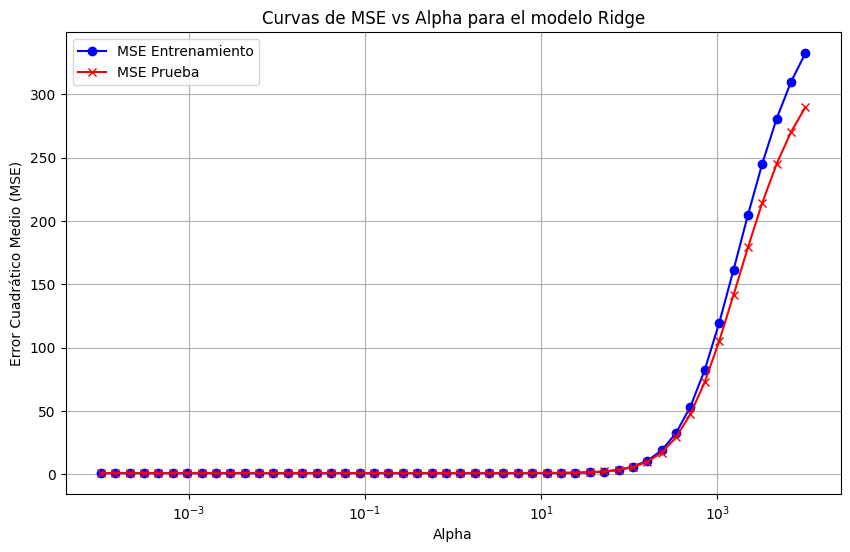

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Definir un rango de valores para el hiperparámetro alpha
alphas = np.logspace(-4, 4, 50)  # Probar valores de alpha desde 10^-4 hasta 10^4

# Inicializar listas para guardar los errores
mse_train = []
mse_test = []

# Loop para probar cada valor de alpha
for alpha in alphas:
    # Crear y entrenar el modelo Ridge con un valor específico de alpha
    modelo_ridge = Ridge(alpha=alpha)
    modelo_ridge.fit(X_train, y_train)

    # Predecir en el conjunto de entrenamiento y prueba
    y_train_pred = modelo_ridge.predict(X_train)
    y_test_pred = modelo_ridge.predict(X_test)

    # Calcular el MSE para entrenamiento y prueba
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train, label='MSE Entrenamiento', color='blue', marker='o')
plt.plot(alphas, mse_test, label='MSE Prueba', color='red', marker='x')
plt.xscale('log')  # Escala logarítmica para visualizar mejor los valores de alpha
plt.xlabel('Alpha')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Curvas de MSE vs Alpha para el modelo Ridge')
plt.legend()
plt.grid(True)
plt.show()


Interpretación del gráfico:

Rango de alpha muy bajo (10⁻³ a 10¹):

En este rango, los valores de MSE para los conjuntos de entrenamiento y prueba son muy similares y extremadamente bajos. Esto indica que el modelo tiene un buen ajuste. Aquí el alpha es muy pequeño, lo que significa que hay poca regularización, y el modelo está capturando bien las relaciones en los datos.
Rango de alpha moderado (10⁰ a 10²):

A medida que alpha aumenta, comenzamos a ver un pequeño aumento en el MSE, pero todavía los errores de entrenamiento y prueba son similares. Esto indica que el modelo sigue teniendo un buen rendimiento y no hay signos claros de sobreajuste ni subajuste.

Sin embargo, el error comienza a crecer más rápido en el conjunto de entrenamiento que en el conjunto de prueba, lo que puede ser una señal inicial de subajuste.

Rango de alpha muy alto (mayor que 10²):

En este punto, el MSE en ambos conjuntos comienza a crecer de manera significativa, pero con una diferencia notable: el error de entrenamiento crece más rápidamente que el de prueba. Esto indica un subajuste.

Cuando alpha es muy alto, la regularización es tan fuerte que el modelo no es capaz de capturar correctamente las relaciones en los datos, lo que provoca que tanto el error en el entrenamiento como en la prueba aumenten.

Conclusiones sobre subajuste y sobreajuste:

Subajuste: Se observa en valores altos de alpha (a partir de aproximadamente
𝛼 mayor que 10².  En este rango, el modelo se vuelve demasiado simplificado y no puede captar la complejidad de los datos, lo que se refleja en un aumento significativo del error en ambos conjuntos, pero especialmente en el conjunto de entrenamiento.

Sobreajuste: En los valores bajos de alpha (de 10⁻4 a 10⁻¹), no se observa sobreajuste en el gráfico, ya que el error en el conjunto de entrenamiento y el de prueba son similares. Esto indica que el modelo está generalizando bien.

Recomendación:

El valor óptimo de alpha se encuentra en un rango moderado, posiblemente entre 10⁻¹ y 10¹, donde el MSE se mantiene bajo y estable tanto para el conjunto de entrenamiento como para el conjunto de prueba.

Para la empresa, esto implica que la selección adecuada de alpha ayuda a crear un modelo que no está ni sobreajustado ni subajustado, proporcionando predicciones más confiables y generalizables a nuevos datos. Esto es clave para cualquier aplicación empresarial, ya que un modelo que generalice bien puede tener un impacto positivo en la toma de decisiones basada en datos.

a continuacion detallo algunas ventajas de llevar a la practica modelos como los definidos en este desafio, al contar con un modelo predictivo bien ajustado y evaluado

# **Decisiones de Producción basadas en Modelos Predictivos**

En términos concretos, si tienemos un objetivo de producción o una meta específica (por ejemplo, cuánto producir en una temporada o cuánto stock tener), podemos utilizar el modelo que he ajustado para:

**Predecir la demanda futura**: Con base en los datos históricos de ventas, comportamiento de los clientes, y otros factores (como estacionalidad o campañas de marketing), el modelo puede estimar cuánto se demandará en un periodo específico.

**Evaluar el impacto de las variables clave**: Las variables que alimentan el modelo, como precios, marketing, recursos disponibles, entre otras, me permitirán simular diferentes escenarios. Por ejemplo:

¿Qué pasa si aumento el presupuesto de marketing en un 10%?

¿Cómo varía la demanda si ajusto los precios en un 5%?

¿Cómo afectará la demanda una nueva tendencia en el mercado?

Optimizar la producción: Con el modelo predictivo ajustado, puedo calcular no solo cuántas unidades producir, sino también planificar cuándo producirlas, evitando excesos de inventario o faltantes. Esto te ayuda a:

Evitar costos innecesarios por sobreproducción.

Prevenir pérdidas de ventas debido a no poder cumplir con la demanda.

Simulaciones con el Modelo

Una vez que tengo el modelo bien calibrado, puedo usarlo para simular diferentes escenarios de producción. Por ejemplo:

Si proyecto que la demanda en el próximo trimestre será de 10,000 unidades basándome en los datos actuales, puedo calcular cuánto stock producir, cuántos insumos comprar, y cómo organizar la logística de distribución.

El modelo puede ayudarme a ajustar la producción de manera dinámica si observo que las variables cambian, como una demanda más alta de lo esperado o interrupciones en la cadena de suministro.

¿Qué debo hacer con las variables que intervienen?

La clave está en que el modelo me muestra cómo cada variable afecta la producción. Dependiendo de las variables que están en el modelo (precio, promociones, estacionalidad, comportamiento del cliente, entre otras), puedo ajustar estas variables para:

Maximizar la producción sin generar sobrecostos.

Minimizar riesgos al anticiparte a picos de demanda.

Ajustar la oferta en función de los patrones esperados.

# **Conclusión Final**

El modelo no solo me ayuda a predecir cuánta demanda habrá, sino también a optimizar todas las decisiones relacionadas con la producción. Desde la cantidad exacta de insumos que necesitare hasta el momento ideal para producir, puedo usar el modelo para simular diferentes escenarios y asegurarteme de tomar las mejores decisiones, minimizando riesgos y maximizando el rendimiento operativo y financiero.

Es una herramienta esencial para hacer que las operaciones productivas sean más eficientes y rentables, permitiendo al empresario ajustarse de manera proactiva a las demandas del mercado y las condiciones cambiantes del entorno.

# **Fuentes de inspiración**
1. Prompt de ChatGPT: "explicame como puedo convertir la generacion del data set sintetico para entrenar modelos de regresion que realice, en un data set para emplear el analisis de regresion en un estudio de maximizacion y minimizacion de un problema de Investigacion operativa."
2. Documentación de Scikit-learn: https://scikit-learn.org/stable/documentation.html
3. Tutorial "Understanding Decision Tree Regression" en Towards Data Science: https://towardsdatascience.com
4.	Prompt de Copilot: "Guia de pasos para desarrollar un problema de regresión en Google”
5.	colab.research.google.com
6.	youtube.com (Como Realizar un Análisis de Regresión Lineal en Python (Google Colab))
7.	idival.org
8.	cienciadedatos.net
9.	Apuntes de la catedra y trabajos realizados sobre Regresion durante la cursada. Profesora Ana Diedrichs
